# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Primeiro caso de teste

In [2]:
#função fitness
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


In [3]:
#população inicial (primeira geração)
n_pop = 100
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[9.31256790e-01, 7.62321473e-01, 8.16524850e-01],
       [3.72054246e-01, 1.34956319e-01, 2.88812275e-02],
       [6.92837317e-02, 4.40325465e-01, 4.87747041e-02],
       [9.22197601e-01, 4.51757561e-01, 7.39073735e-01],
       [6.03542692e-01, 6.13801731e-01, 2.22803535e-04],
       [8.28305102e-01, 7.49748903e-02, 4.90225327e-02],
       [8.76566886e-01, 8.03930224e-01, 9.94312879e-01],
       [8.59072229e-01, 4.55267142e-01, 4.93341556e-01],
       [9.74071458e-01, 5.90522299e-01, 6.06697806e-01],
       [3.32351235e-01, 7.49615058e-01, 5.08850925e-01],
       [7.92145545e-02, 4.26850482e-01, 9.64719253e-01],
       [3.50930685e-01, 3.48296026e-01, 8.58816937e-02],
       [7.15260559e-02, 1.01236325e-01, 9.76540736e-01],
       [4.92313065e-01, 9.54369273e-01, 9.33187926e-01],
       [8.41871554e-01, 7.55623548e-01, 9.85353307e-01],
       [1.71362986e-01, 4.69758884e-01, 5.83630552e-01],
       [9.11500566e-01, 6.87333567e-01, 4.32293879e-01],
       [9.51323876e-01, 6.74544

In [4]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[ 2.58754074e+00,  2.57392884e+00,  4.89914910e+00],
       [-7.67674522e-01, -1.19026209e+00,  1.73287365e-01],
       [-2.58429761e+00,  6.41952789e-01,  2.92648224e-01],
       [ 2.53318561e+00,  7.10545368e-01,  4.43444241e+00],
       [ 6.21256153e-01,  1.68281039e+00,  1.33682121e-03],
       [ 1.96983061e+00, -1.55015066e+00,  2.94135196e-01],
       [ 2.25940132e+00,  2.82358134e+00,  5.96587727e+00],
       [ 2.15443338e+00,  7.31602851e-01,  2.96004934e+00],
       [ 2.84442875e+00,  1.54313379e+00,  3.64018683e+00],
       [-1.00589259e+00,  2.49769035e+00,  3.05310555e+00],
       [-2.52471267e+00,  5.61102891e-01,  5.78831552e+00],
       [-8.94415888e-01,  8.97761542e-02,  5.15290162e-01],
       [-2.57084366e+00, -1.39258205e+00,  5.85924441e+00],
       [-4.61216082e-02,  3.72621564e+00,  5.59912756e+00],
       [ 2.05122933e+00,  2.53374129e+00,  5.91211984e+00],
       [-1.97182209e+00,  8.18553303e-01,  3.50178331e+00],
       [ 2.46900340e+00,  2.12400140e+00

In [5]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[ 2.58754074e+00,  2.57392884e+00,  4.89914910e+00,
         1.39993761e+02],
       [-7.67674522e-01, -1.19026209e+00,  1.73287365e-01,
         4.74511306e+02],
       [-2.58429761e+00,  6.41952789e-01,  2.92648224e-01,
         3.85250347e+02],
       [ 2.53318561e+00,  7.10545368e-01,  4.43444241e+00,
         1.18489197e+02],
       [ 6.21256153e-01,  1.68281039e+00,  1.33682121e-03,
         2.73206080e+02],
       [ 1.96983061e+00, -1.55015066e+00,  2.94135196e-01,
         4.81128238e+02],
       [ 2.25940132e+00,  2.82358134e+00,  5.96587727e+00,
         2.93319481e+02],
       [ 2.15443338e+00,  7.31602851e-01,  2.96004934e+00,
         4.55516724e+01],
       [ 2.84442875e+00,  1.54313379e+00,  3.64018683e+00,
         5.04888842e+01],
       [-1.00589259e+00,  2.49769035e+00,  3.05310555e+00,
         4.52745705e+01],
       [-2.52471267e+00,  5.61102891e-01,  5.78831552e+00,
         3.98885595e+02],
       [-8.94415888e-01,  8.97761542e-02,  5.15290162e-01,
      

In [6]:
#ordenação
pop_ord = pop[pop[0:, -1].argsort()]
pop_ord

array([[ 3.20149622e-01,  1.28855250e+00,  2.83174488e+00,
         1.55944097e+01],
       [ 6.93227026e-01,  2.92693489e+00,  2.74328420e+00,
         2.01023526e+01],
       [ 1.08876317e+00,  3.04908408e+00,  2.69943842e+00,
         2.48004553e+01],
       [ 2.46900340e+00,  2.12400140e+00,  2.59376327e+00,
         2.68380852e+01],
       [ 1.38748552e+00,  2.94431827e+00,  2.35431430e+00,
         3.18434908e+01],
       [-5.73886735e-01,  1.51591888e+00,  2.52933383e+00,
         3.61036846e+01],
       [ 1.72080465e+00,  2.99587716e+00,  2.35329436e+00,
         3.75778657e+01],
       [ 4.52939132e-01,  1.02385561e+00,  3.73739221e+00,
         3.83623315e+01],
       [ 2.70794326e+00,  2.04726896e+00,  3.55924912e+00,
         3.85981762e+01],
       [ 1.06393741e+00,  2.88941757e+00,  3.91078812e+00,
         4.07482018e+01],
       [-8.82486363e-01,  1.51994810e+00,  3.28394953e+00,
         4.24653657e+01],
       [-1.00589259e+00,  2.49769035e+00,  3.05310555e+00,
      

In [7]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[ 3.20149622e-01,  1.28855250e+00,  2.83174488e+00,
         1.55944097e+01],
       [ 6.93227026e-01,  2.92693489e+00,  2.74328420e+00,
         2.01023526e+01],
       [ 1.08876317e+00,  3.04908408e+00,  2.69943842e+00,
         2.48004553e+01],
       [ 2.46900340e+00,  2.12400140e+00,  2.59376327e+00,
         2.68380852e+01],
       [ 1.38748552e+00,  2.94431827e+00,  2.35431430e+00,
         3.18434908e+01],
       [-5.73886735e-01,  1.51591888e+00,  2.52933383e+00,
         3.61036846e+01],
       [ 1.72080465e+00,  2.99587716e+00,  2.35329436e+00,
         3.75778657e+01],
       [ 4.52939132e-01,  1.02385561e+00,  3.73739221e+00,
         3.83623315e+01],
       [ 2.70794326e+00,  2.04726896e+00,  3.55924912e+00,
         3.85981762e+01],
       [ 1.06393741e+00,  2.88941757e+00,  3.91078812e+00,
         4.07482018e+01],
       [-8.82486363e-01,  1.51994810e+00,  3.28394953e+00,
         4.24653657e+01],
       [-1.00589259e+00,  2.49769035e+00,  3.05310555e+00,
      

In [8]:
#contagem de população estagnada
cont = 0
delta = 0.01

In [9]:
sem_evoluir = 100
i_desejadas = 5
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop_inicial.copy()

            #novos 50% da população
            nova_pop = criaPop(int(n_pop/2),dim)

            #converter para as faixas
            nova_pop = converter1(nova_pop)

            #fitness da nova população
            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(n_pop/2),dim)

            nova_pop = converter1(nova_pop)

            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao >= delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)
    #print('Número de iterações para a convergência: ',i+1)

#media e desvio padrao dos fits
desvioP = np.std(tabela,axis=1)
media = np.mean(tabela,axis=1)
desvioSup = media + desvioP
desvioInf = media - desvioP
tabela

,0,0,0,0,0
0,15.594410,4.198256,10.914722,15.594410,7.797063
1,15.594410,3.941138,10.914722,1.125389,7.797063
2,15.594410,3.941138,7.351571,1.125389,7.797063
3,15.594410,3.941138,7.351571,1.125389,7.797063
4,13.522891,3.941138,7.351571,1.125389,7.797063
...,...,...,...,...,...
95,0.588273,0.770793,0.821856,0.572013,0.353806
96,0.588273,0.770793,0.821856,0.572013,0.353806
97,0.588273,0.770793,0.821856,0.572013,0.353806
98,0.588273,0.770793,0.821856,0.572013,0.353806


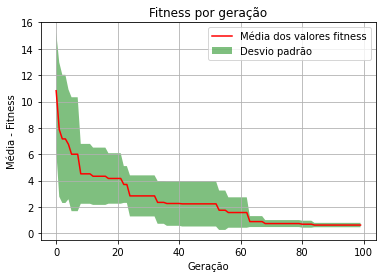


Número de iterações para a última convergência:  100


In [10]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("Média - Fitness")
plt.plot(media, color = "red", label = "Média dos valores fitness")
plt.fill_between(range(len(media)), desvioSup, desvioInf, facecolor='green', alpha=0.5, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)

## Segundo caso de teste

In [11]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [12]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [13]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [14]:
#palavra aleatoria (ja convertida para os limites da palavra alvo)
palavra = [converter2(criaPop(tamanho_2,dim_2))]
palavra

[array([ 72.8858122 , 110.86431571, 108.26610574, 126.23666227,
         88.03045028,  98.43499138,  88.03237157,  53.41835467,
        115.06017126,  87.75547772, 110.27464876,  95.77469935,
        117.58918455, 118.02026664,  97.59874097,  61.05814274,
         97.7922264 ,  74.19285658,  84.86598481, 119.07679229,
        109.39140637, 119.64918812,  82.6924056 ,  85.00717815,
         91.93384143,  57.38954524,  74.50208065,  61.31080676,
         55.55824598, 110.13605818])]

In [15]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[7.28858122e+01, 4.13667282e+02],
       [1.10864316e+02, 3.40090931e+03],
       [1.08266106e+02, 3.10461874e+03],
       [1.26236662e+02, 5.43016633e+03],
       [8.80304503e+01, 1.25907524e+03],
       [9.84349914e+01, 2.10570775e+03],
       [8.80323716e+01, 1.25921160e+03],
       [5.34183547e+01, 7.59258961e-01],
       [1.15060171e+02, 3.90789658e+03],
       [8.77554777e+01, 1.23963690e+03],
       [1.10274649e+02, 3.33248143e+03],
       [9.57746994e+01, 1.86863399e+03],
       [1.17589185e+02, 4.23048577e+03],
       [1.18020267e+02, 4.28674865e+03],
       [9.75987410e+01, 2.02965936e+03],
       [6.10581427e+01, 7.24395507e+01],
       [9.77922264e+01, 2.04713051e+03],
       [7.41928566e+01, 4.68543107e+02],
       [8.48659848e+01, 1.04451678e+03],
       [1.19076792e+02, 4.42621326e+03],
       [1.09391406e+02, 3.23128654e+03],
       [1.19649188e+02, 4.50270365e+03],
       [8.26924056e+01, 9.08745479e+02],
       [8.50071781e+01, 1.05366317e+03],
       [9.193384

In [16]:
#ordenar
palavra_ord = palavra[palavra[0:, -1].argsort()]
#50% melhores
melhor_palavra_inicial = palavra_ord[0:int(tamanho_2/2),:]
melhor_palavra_inicial

array([[5.34183547e+01, 7.59258961e-01],
       [5.55582460e+01, 9.06760238e+00],
       [5.73895452e+01, 2.34502444e+01],
       [6.10581427e+01, 7.24395507e+01],
       [6.13108068e+01, 7.68043089e+01],
       [7.28858122e+01, 4.13667282e+02],
       [7.41928566e+01, 4.68543107e+02],
       [7.45020807e+01, 4.82025567e+02],
       [8.26924056e+01, 9.08745479e+02],
       [8.48659848e+01, 1.04451678e+03],
       [8.50071781e+01, 1.05366317e+03],
       [8.77554777e+01, 1.23963690e+03],
       [8.80304503e+01, 1.25907524e+03],
       [8.80323716e+01, 1.25921160e+03],
       [9.19338414e+01, 1.55132328e+03]])

In [17]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [18]:
#funcao random walk
#parametros: melhor_pop_inicial, n_pop, dim, converter, funcao fitness, tabela
#problema: funcao fitness

In [29]:
tabela2 = pd.DataFrame()
for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_palavra_inicial.copy() #troca melhor_pop_inicial

            #novos 50% da população
            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            #converter para as faixas
            nova_pop = converter2(nova_pop) #troca converter1

            #fitness da nova população
            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()] 

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_2/2),:]

            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            nova_pop = converter2(nova_pop) #troca converter1

            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao >= delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela2 = pd.concat([tabela2, pd.DataFrame(melhor_i)], axis=1) #troca tabela
    #print('Número de iterações para a convergência: ',i)

#media e desvio padrao dos fits
desvioP2 = np.std(tabela2,axis=1)
media2 = np.mean(tabela2,axis=1)
desvioInf2 = media2 - desvioP2
desvioSup2 = media2 + desvioP2

tabela2

,0,0,0,0,0
0,0.085559,0.011588,0.759259,0.222249,0.759259
1,0.085559,0.011588,0.218987,0.222249,0.759259
2,0.085559,0.011588,0.218987,0.222249,0.759259
3,0.085559,0.011588,0.218987,0.039548,0.759259
4,0.085559,0.011588,0.218987,0.039548,0.759259
...,...,...,...,...,...
95,0.015605,0.000520,0.000165,0.000322,0.000776
96,0.015605,0.000520,0.000165,0.000322,0.000776
97,0.015605,0.000520,0.000165,0.000322,0.000776
98,0.015605,0.000520,0.000165,0.000322,0.000776


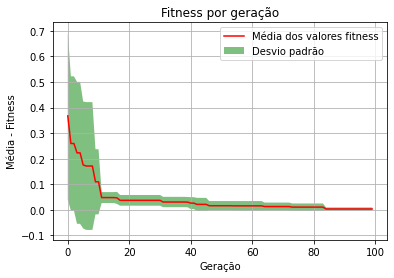


Número de iterações para a última convergência:  100


In [30]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("Média - Fitness")
plt.plot(media2, color = "red", label = "Média dos valores fitness")
plt.fill_between(range(len(media2)), desvioSup2, desvioInf2, facecolor='green', alpha=0.5, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)<br>

## Terceiro caso de teste

In [31]:
#função rastrigin
def rastrigin(x):
    return 10 * len(x) + sum(i * i - 10 * cos(2 * pi * i) for i in x)